In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

# 작업형 2
### 1. 데이터 수집

In [68]:
sns.get_dataset_names()
df = sns.load_dataset('penguins')
print(f'Data Frame Shpae: {df.shape}\n')
df.info()

Data Frame Shpae: (344, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


-----
### 2. 결측치 보정
&rarr; 평균값 대치, 삭제, 예측 등의 다양한 방법론 존재


In [69]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [70]:
missing = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in missing:
    med_val = df[col].median()  ### 괄호 제대로
    df[col] = df[col].fillna(med_val)  ### 통계치를 따로 구한 후 넣어야
df['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [71]:
df['sex'] = df['sex'].fillna('Male')

In [72]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

------

### 3. 라벨인코딩
&rarr; 문자형 데이터를 코드형 숫자값으로 변환

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [74]:
label = ['species', 'island', 'sex']

In [75]:
from sklearn.preprocessing import LabelEncoder
df[label] = df[label].apply(LabelEncoder().fit_transform)    ### 외우기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB


In [76]:
help('sklearn.preprocessing.LabelEncoder.fit_transform')

Help on function fit_transform in sklearn.preprocessing.LabelEncoder:

sklearn.preprocessing.LabelEncoder.fit_transform = fit_transform(self, y)
    Fit label encoder and return encoded labels.
    
    Parameters
    ----------
    y : array-like of shape (n_samples,)
        Target values.
    
    Returns
    -------
    y : array-like of shape (n_samples,)
        Encoded labels.



-----
### 4. 데이터 타입, 더미 변환
&rarr; 칼럼의 데이터 타입을 'category'형으로 바꾸고 새로운 칼럼을 생성해 One-Hot-Encoding
<br/>
&rarr; 단, 반드시 기존에 숫자형으로 전환된 칼럼으로 전환되어야 함

In [77]:
df[['species', 'island', 'sex']].head()

,species,island,sex
0,0,2,1
1,0,2,0
2,0,2,0
3,0,2,1
4,0,2,0


In [78]:
# Convert Data Type
category = ['island', 'sex']
for col in category:
    df[col] = df[col].astype('category')    ### 'category'라는 dtype이 있는듯
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    int64   
 1   island             344 non-null    category
 2   bill_length_mm     344 non-null    float64 
 3   bill_depth_mm      344 non-null    float64 
 4   flipper_length_mm  344 non-null    float64 
 5   body_mass_g        344 non-null    float64 
 6   sex                344 non-null    category
dtypes: category(2), float64(4), int64(1)
memory usage: 14.5 KB


In [79]:
# Get Dummies (Spread the Frame; Category --> One-Hot-Encoding)
before = df.shape
df = pd.get_dummies(df)
print(f'>>> Shape Converted from {before} to {df.shape}\n')
df.info()

>>> Shape Converted from (344, 7) to (344, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   bill_length_mm     344 non-null    float64
 2   bill_depth_mm      344 non-null    float64
 3   flipper_length_mm  344 non-null    float64
 4   body_mass_g        344 non-null    float64
 5   island_0           344 non-null    uint8  
 6   island_1           344 non-null    uint8  
 7   island_2           344 non-null    uint8  
 8   sex_0              344 non-null    uint8  
 9   sex_1              344 non-null    uint8  
dtypes: float64(4), int64(1), uint8(5)
memory usage: 15.2 KB


-----
### 5. 파생변수 생성

In [80]:
# Discretize with qcut
df['body_mass_g_qcut'] = pd.qcut(df['body_mass_g'], 5, labels=False)    ### 외우기
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_0,island_1,island_2,sex_0,sex_1,body_mass_g_qcut
0,0,39.10,18.7,181.0,3750.0,0,0,1,0,1,1
1,0,39.50,17.4,186.0,3800.0,0,0,1,1,0,1
2,0,40.30,18.0,195.0,3250.0,0,0,1,1,0,0
3,0,44.45,17.3,197.0,4050.0,0,0,1,0,1,2
4,0,36.70,19.3,193.0,3450.0,0,0,1,1,0,0


-----
### 6. 정규화, 스케일링
&rarr; 변수 간 데이터 값의 수준이 비슷해지도록 조정하는 과정 <br/>
&rarr; 정규화의 경우 0~1 사이 값으로 변환하는 min-max 정규화가 일반적 <br/>
&rarr; 그 외
- StandardScaler: 평균=0, 표준편차=1의 정규분포로 변환, 분류 분석에 많이 활용
- RobustScaler: 중앙값=0, 최댓값=1, 최솟값=-1의 분포로 변환, 이상치의 영향 최소화
- MaxAbsScaler: 0~1 사이의 값으로 변환되나, 이상치에 민감 (양수일 땐 MinMaxScaler와 동일)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   bill_length_mm     344 non-null    float64
 2   bill_depth_mm      344 non-null    float64
 3   flipper_length_mm  344 non-null    float64
 4   body_mass_g        344 non-null    float64
 5   island_0           344 non-null    uint8  
 6   island_1           344 non-null    uint8  
 7   island_2           344 non-null    uint8  
 8   sex_0              344 non-null    uint8  
 9   sex_1              344 non-null    uint8  
 10  body_mass_g_qcut   344 non-null    int64  
dtypes: float64(4), int64(2), uint8(5)
memory usage: 17.9 KB


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
minmax = MinMaxScaler() ### 0~1사이 값으로 정규화
minmax.fit(df[scaler])
df[scaler] = minmax.transform(df[scaler])

In [83]:
help('sklearn.preprocessing.MinMaxScaler.fit')
print()
help('sklearn.preprocessing.MinMaxScaler.transform')

Help on function fit in sklearn.preprocessing.MinMaxScaler:

sklearn.preprocessing.MinMaxScaler.fit = fit(self, X, y=None)
    Compute the minimum and maximum to be used for later scaling.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        The data used to compute the per-feature minimum and maximum
        used for later scaling along the features axis.
    
    y : None
        Ignored.
    
    Returns
    -------
    self : object
        Fitted scaler.


Help on function transform in sklearn.preprocessing.MinMaxScaler:

sklearn.preprocessing.MinMaxScaler.transform = transform(self, X)
    Scale features of X according to feature_range.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Input data that will be transformed.
    
    Returns
    -------
    Xt : ndarray of shape (n_samples, n_features)
        Transformed data.



-----
### 7. 데이터 분리

In [84]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_0,island_1,island_2,sex_0,sex_1,body_mass_g_qcut
0,0,0.254545,0.666667,0.152542,0.291667,0,0,1,0,1,1
1,0,0.269091,0.511905,0.237288,0.305556,0,0,1,1,0,1
2,0,0.298182,0.583333,0.389831,0.152778,0,0,1,1,0,0
3,0,0.449091,0.500000,0.423729,0.375000,0,0,1,0,1,2
4,0,0.167273,0.738095,0.355932,0.208333,0,0,1,1,0,0


##### df.iloc[row, col]
- 데이터프레임을 행과 열의 integer location를 기준으로 인덱싱하고 슬라이싱하는 데 사용

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['species'],
                                                    test_size=0.2, stratify=df['species'], random_state=1)
# stratify 옵션: 종속변수 'species'의 데이터 비율을 고려해 split

In [90]:
print(f'For Train - X: {X_train.shape} / y: {y_train.shape}')
print(f'For Test - X: {X_test.shape} / y: {y_test.shape}')

For Train - X: (275, 10) / y: (275,)
For Test - X: (69, 10) / y: (69,)


-----
### 8. 모델 학습 및 앙상블

##### 머신러닝 유형
- 회귀 (Regression)
- 분류 (Classification)
- 군집 (Clustering)

In [ ]:
# Regression: 선형회귀, 다중선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Regression: 다항회귀, 회귀트리
from sklearn.preprocessing import PolynomialFeatures
quad_featurizer = PolynomialFeatures(degree=2)
X_train = quad_featurizer.fit_transform(X_train)
X_test = quad_featurizer.fit_transform(X_test)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)

# Inference & Evaluation
model.fit(X_train, y_train)
predicted = model.predict(X_test)
r_squared = model.score(X_test, y_test)

# ---------------------------------------------------------- #

# Binary Classifier: 로지스틱회귀, 선형SVM
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.svm import LinearSVC
model = LinearSVC()

# Classifier: SVM, 분류트리, 랜덤포레스트, AdaBoost
from sklearn.svm import SVC
model = SVC()

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50)

# Inference
model.fit(X_train, y_train)
predicted = model.predict(X_test)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted)

# ---------------------------------------------------------- #

# Clustering: K-Means
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

# Inference
model.fit(X_train)

##### Model 1 & Model 2

In [105]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(max_depth=6, n_estimators=100)
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)

In [106]:
from sklearn.ensemble import AdaBoostClassifier
model2 = AdaBoostClassifier()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)

##### 앙상블
- Bagging (Bootstrap Aggregation): 
  Random Sapling으로 새로운 데이터셋 학습 후 종합
- Boosting: 반복적으로 모델 업데이트하며 데이터셋에 가중치 부여
- Stacking: 여러 개의 종류가 다른 모델을 이용해 학습 (메타예측기에서 기초예측기 결과 병합)

##### Ensemble

In [103]:
# Ensemble: Bagging, Stacking, Voting
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()

from sklearn.ensemble import StackingClassifier
model = StackingClassifier(estimators=[('rf', model1), ('ad', model2)])

from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('rf', model1), ('ad', model2)])

# Inference
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [107]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('rf', model1), ('ad', model2)], voting='hard')  # soft는 확률기반
model.fit(X_train, y_train)
pred = model.predict(X_test)

-----
### 9. 모델 평가

In [ ]:
# Regression Metrics
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred)

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, pred)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)

# Classification Metrics
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)

from sklearn.metrics import precision_score
prc = precision_score(y_test, pred)

from sklearn.metrics import recall_score
rec = recall_score(y_test, pred)

In [ ]:
from sklearn.metrics import accuracy_score  ### 외우기
from sklearn.metrics import classification_report
print(f'Random Forest: {accuracy_score(y_test, pred1)}')
print(f'Adaboost: {accuracy_score(y_test, pred2)}')
print(f'Voting: {accuracy_score(y_test, pred)}')

Random Forest: 1.0
Adaboost: 0.9855072463768116
Voting: 1.0


##### 회귀 (Regression)
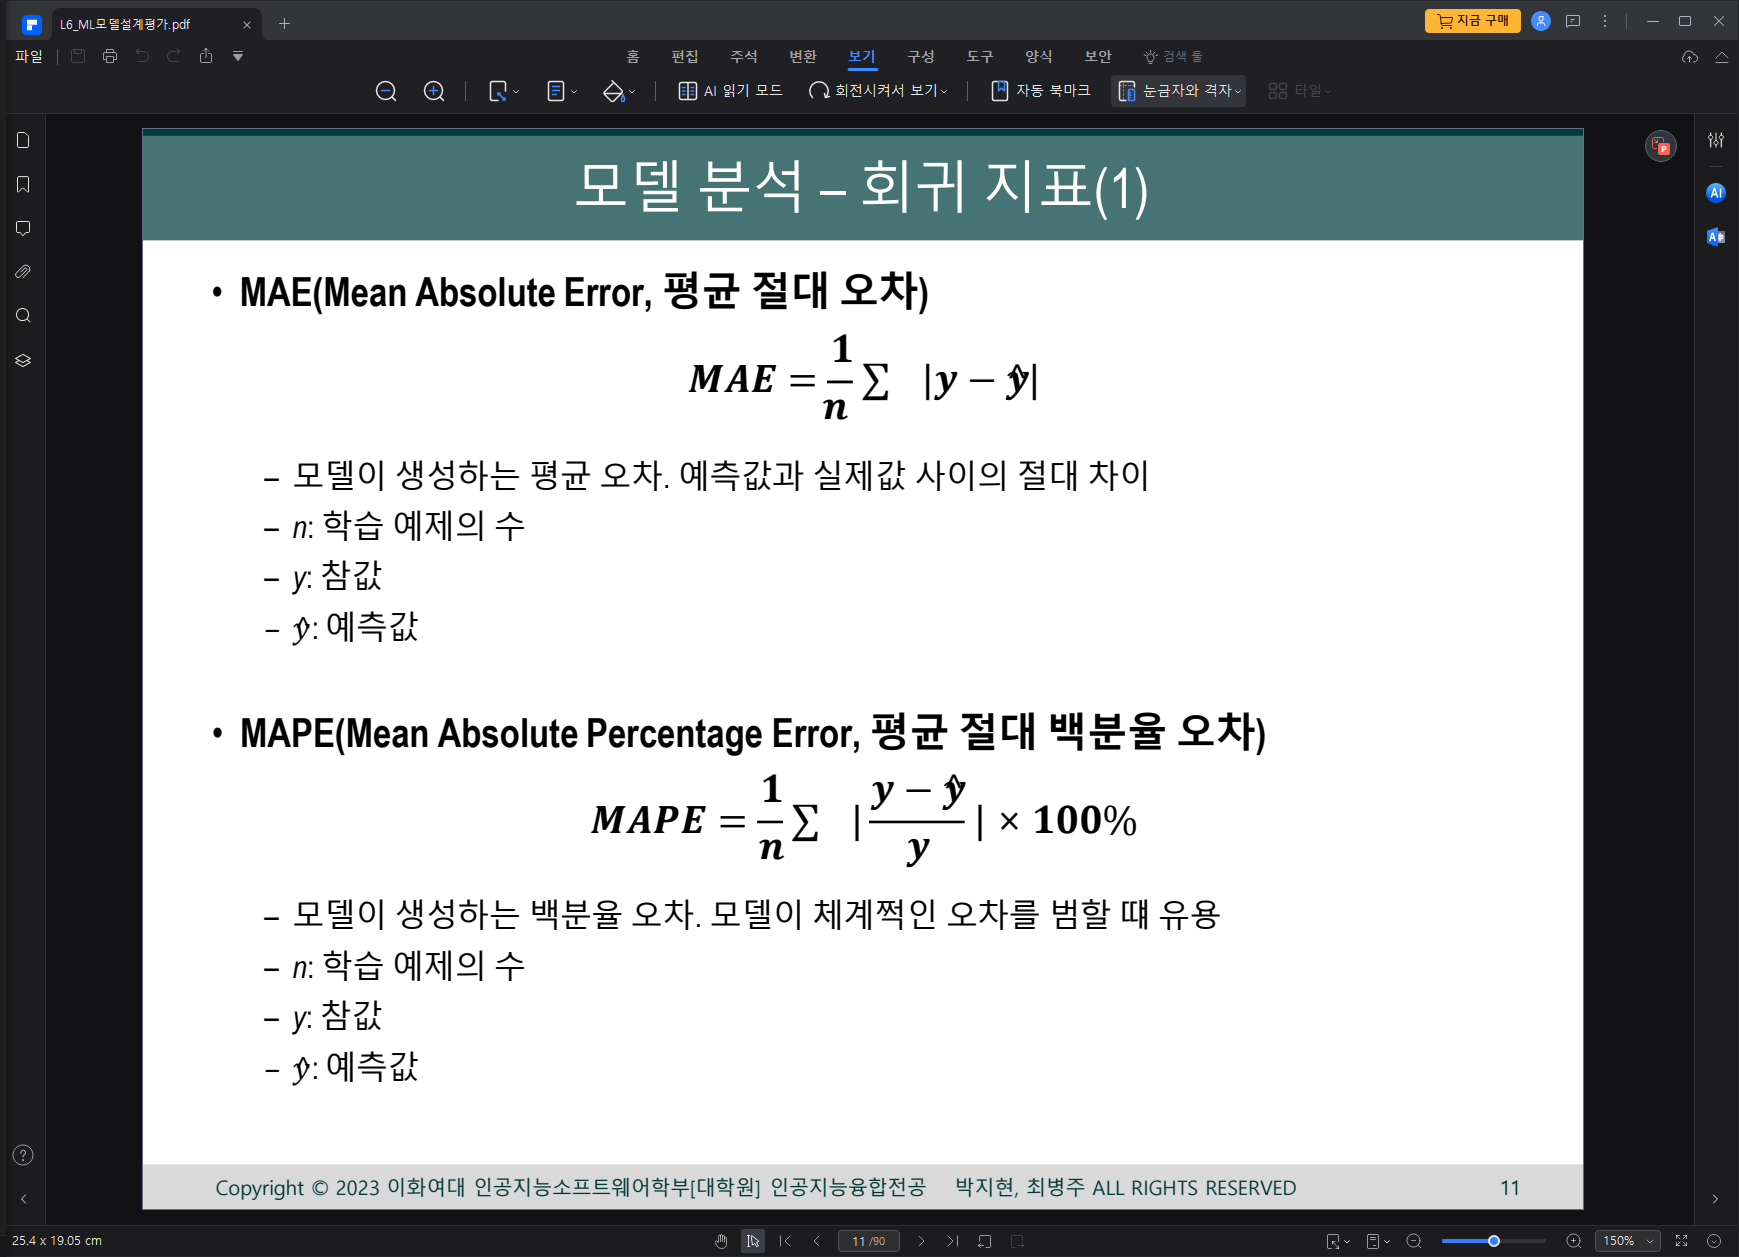
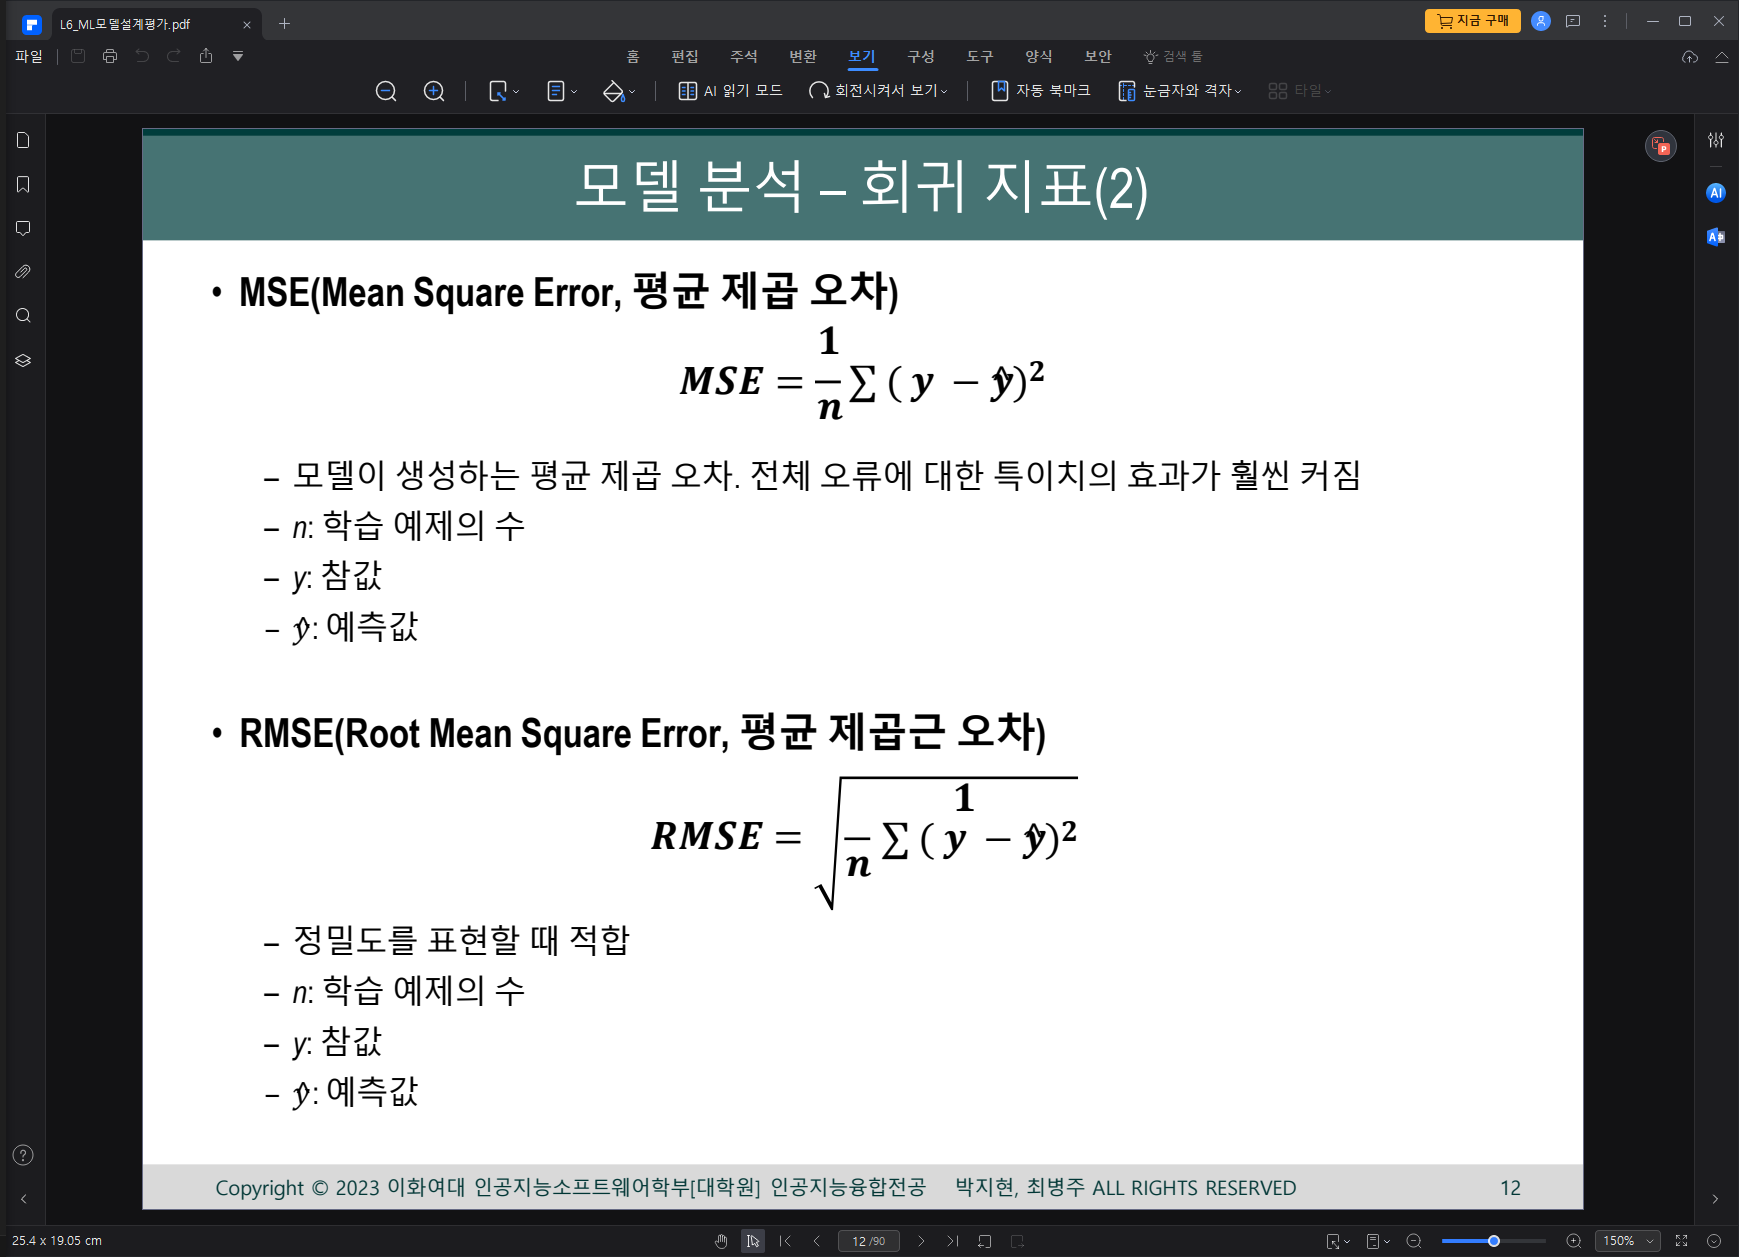

#### 분류 (Classification)
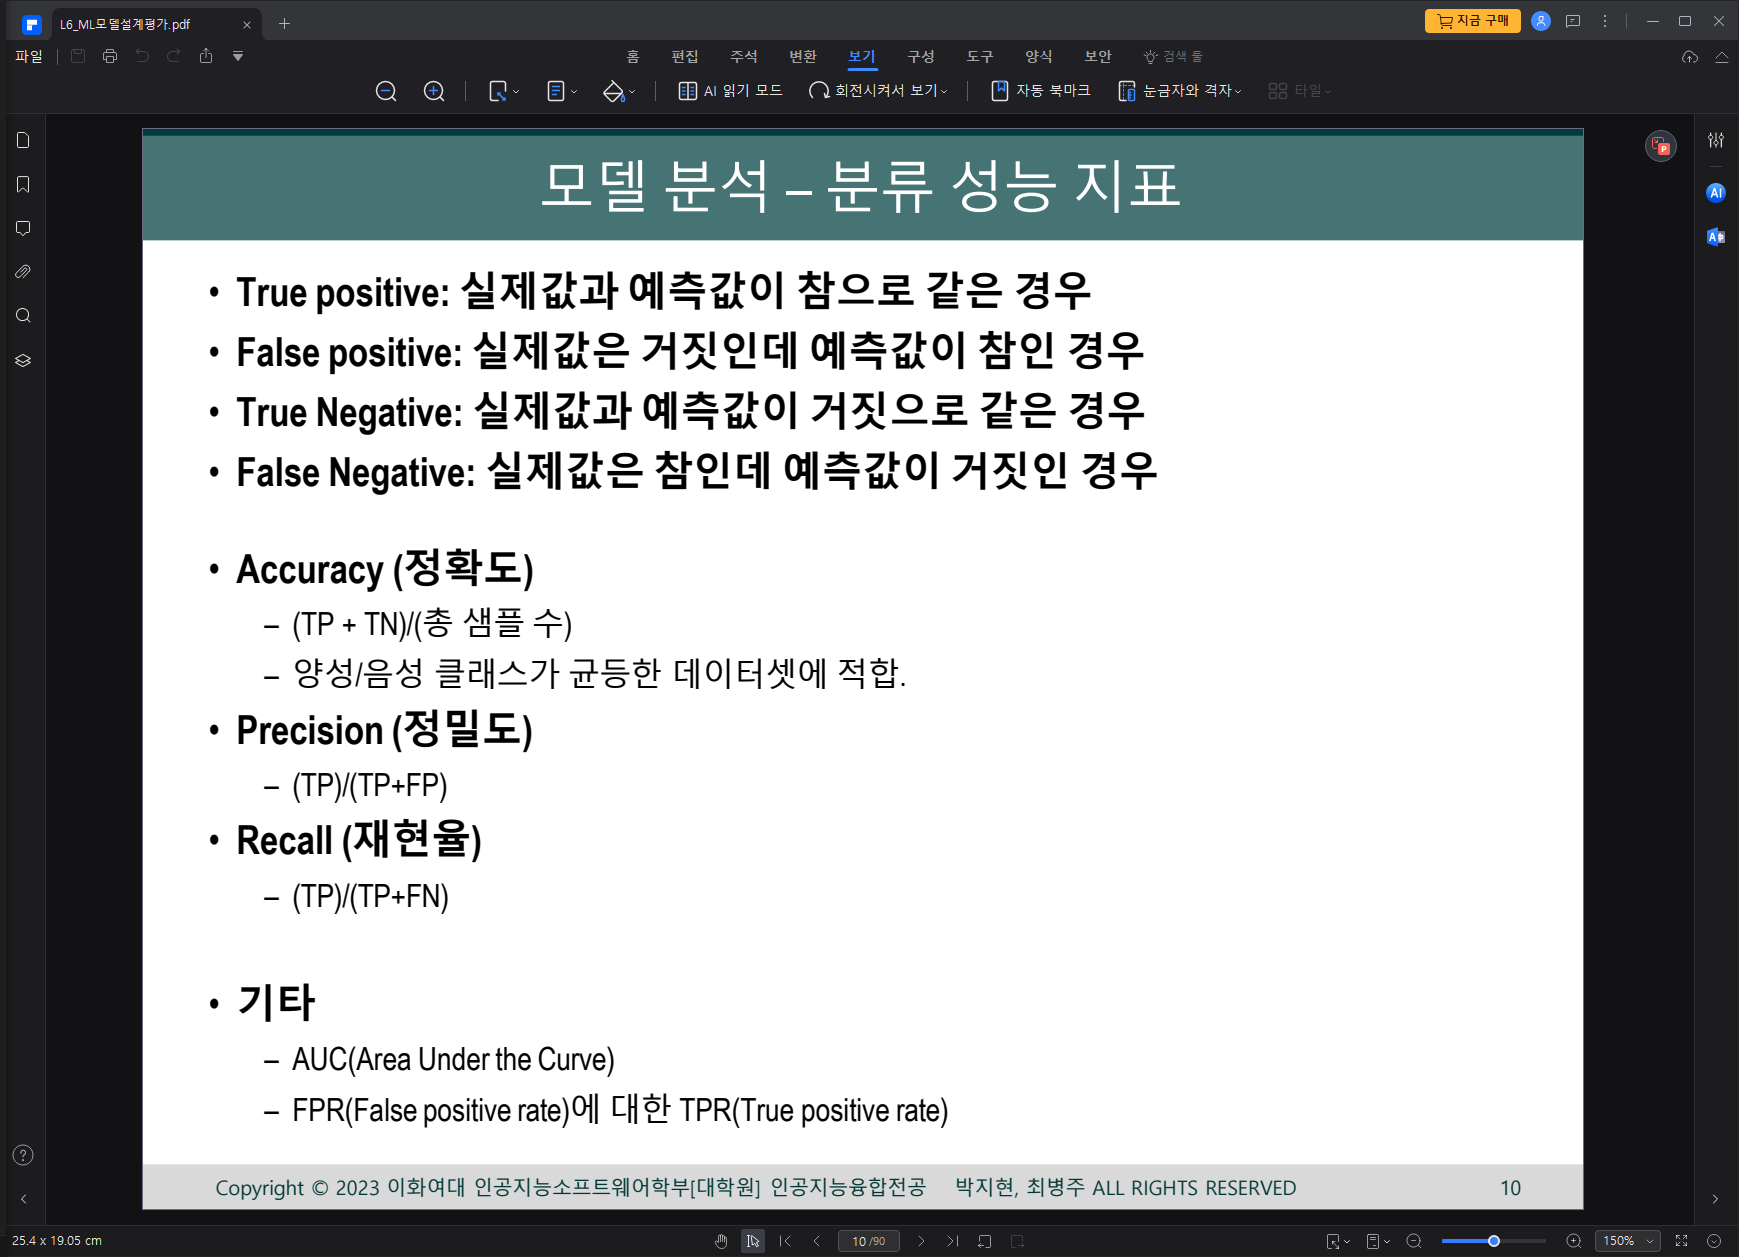

-----
### 10. 저장 및 답안 제출

In [109]:
pd.DataFrame({'id': y_test.index, 'pred':pred}).to_csv('predictions.csv', index=False)  ### Index 키워드 반드시 넣기

In [110]:
check = pd.read_csv('predictions.csv')
check.head()

,id,pred
0,57,0
1,173,1
2,213,1
3,50,0
4,25,0
